Ways to extract features of text data in order to feed it into a Machine Learning model.<br>
<br>
- Count Vectorizer
- tf-idf

Word Embedding: maps words to real number vectors
I will first use Word2Vec from the gensim library. 
It has two models for training: 
- skip-gram
- continuous bag of words



In [38]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
import numpy as np
import re
import io
from collections import Counter

In [3]:
df = pd.read_csv('../data/train.csv')

In [11]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
corpus = df['text'].dropna()

In [8]:
corpus.head()

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else, not even gold, the Super...
Name: text, dtype: object

In [18]:
corpus_string = df.text.str.cat(sep=' ')

In [19]:
type(corpus_string)

str

## Tokenize

In [20]:
text=re.sub(r"[^.A-Za-z]",' ',corpus_string)
sentence=text.split('.')
tokens=[nltk.word_tokenize(words) for words in sentence]
tokens

[['This',
  'process',
  'however',
  'afforded',
  'me',
  'no',
  'means',
  'of',
  'ascertaining',
  'the',
  'dimensions',
  'of',
  'my',
  'dungeon',
  'as',
  'I',
  'might',
  'make',
  'its',
  'circuit',
  'and',
  'return',
  'to',
  'the',
  'point',
  'whence',
  'I',
  'set',
  'out',
  'without',
  'being',
  'aware',
  'of',
  'the',
  'fact',
  'so',
  'perfectly',
  'uniform',
  'seemed',
  'the',
  'wall'],
 ['It',
  'never',
  'once',
  'occurred',
  'to',
  'me',
  'that',
  'the',
  'fumbling',
  'might',
  'be',
  'a',
  'mere',
  'mistake'],
 ['In',
  'his',
  'left',
  'hand',
  'was',
  'a',
  'gold',
  'snuff',
  'box',
  'from',
  'which',
  'as',
  'he',
  'capered',
  'down',
  'the',
  'hill',
  'cutting',
  'all',
  'manner',
  'of',
  'fantastic',
  'steps',
  'he',
  'took',
  'snuff',
  'incessantly',
  'with',
  'an',
  'air',
  'of',
  'the',
  'greatest',
  'possible',
  'self',
  'satisfaction'],
 ['How',
  'lovely',
  'is',
  'spring',
  'As',
 

In [21]:
model = Word2Vec(tokens,size=50,sg=1,min_count=1)

In [22]:
model['house']

<ipython-input-22-a05e2f63d15d>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['house']


array([ 0.04092124,  0.42202434, -0.04087991, -0.77841604,  0.24549475,
        0.02735598, -0.31399426, -0.19396228, -0.08952404, -0.39408988,
       -0.3782642 ,  0.17856926, -0.3922256 ,  0.536874  ,  0.08196928,
       -0.36466777,  0.77740455,  0.31647366, -0.13584754, -0.5158354 ,
       -0.41585535,  0.32507408,  0.00751427, -0.23200199,  0.51063603,
        0.05217406,  0.13005939, -0.21960232, -0.46954164,  0.20539437,
        0.3241742 ,  0.2258333 , -0.28270167,  0.24972114,  0.10388367,
        0.35687608,  0.34017852,  0.48465908, -0.3651425 ,  0.19609143,
       -0.5167768 , -0.00291978, -0.00565633,  0.12889488, -0.14013763,
       -0.20963134, -0.08297085, -0.71038866,  0.08685433,  1.086931  ],
      dtype=float32)

In [23]:
words=list(model.wv.vocab)
print(words)

['This', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'my', 'dungeon', 'as', 'I', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'point', 'whence', 'set', 'out', 'without', 'being', 'aware', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'wall', 'It', 'never', 'once', 'occurred', 'that', 'fumbling', 'be', 'a', 'mere', 'mistake', 'In', 'his', 'left', 'hand', 'was', 'gold', 'snuff', 'box', 'from', 'which', 'he', 'capered', 'down', 'hill', 'cutting', 'all', 'manner', 'fantastic', 'steps', 'took', 'incessantly', 'with', 'an', 'air', 'greatest', 'possible', 'self', 'satisfaction', 'How', 'lovely', 'is', 'spring', 'As', 'we', 'looked', 'Windsor', 'Terrace', 'on', 'sixteen', 'fertile', 'counties', 'spread', 'beneath', 'speckled', 'by', 'happy', 'cottages', 'wealthier', 'towns', 'in', 'former', 'years', 'heart', 'cheering', 'fair', 'Finding', 'nothing', 'else', 'not', 'even', 'Superintendent', 'abandoned', 'attempts', 'but', 'per

In [27]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.head()

<ipython-input-27-98586f9c3d58>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[model.wv.vocab]


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.163563,0.450375,0.078947,-0.979675,0.448813,-0.032367,-0.362696,-0.232541,0.348410,-0.384552,...,-0.388510,0.115046,-0.381004,-0.408774,-0.412388,0.099047,-0.361471,-0.397902,0.321157,0.434135
1,-0.235968,0.266933,0.146926,-0.531545,0.317718,0.033817,-0.066609,-0.110281,-0.077773,-0.313077,...,-0.505875,-0.036504,0.004689,-0.030250,-0.224683,-0.082522,0.204715,-0.266151,0.115480,0.663704
2,-0.361884,0.488915,0.258041,-0.607889,0.289533,0.210330,-0.562068,-0.355972,0.137690,-0.506121,...,-0.456630,0.138074,-0.160788,-0.109525,-0.172951,-0.291432,0.106551,-0.170751,0.166384,0.828487
3,-0.450590,0.428481,-0.005718,-0.411902,0.269890,0.005554,0.052622,-0.010702,-0.050926,-0.299846,...,-0.576506,-0.068792,0.041322,-0.010667,-0.313341,-0.184043,0.254010,-0.470276,0.195709,0.905015
4,-0.079855,-0.132712,-0.275560,-0.561651,0.649385,-0.010681,0.137723,-0.139856,0.621825,0.032359,...,-1.312785,-0.385585,-0.671406,0.360655,0.247770,-0.239625,0.377918,-0.464534,0.167984,0.622645


In [28]:
df.shape

(27481, 50)

We will be implementing PCA using the numpy library. Steps involved in PCA are as follows-

In [29]:
#Computing the correlation matrix
X_corr=df.corr()

In [30]:
#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

In [31]:
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

In [32]:
#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

In [36]:
#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

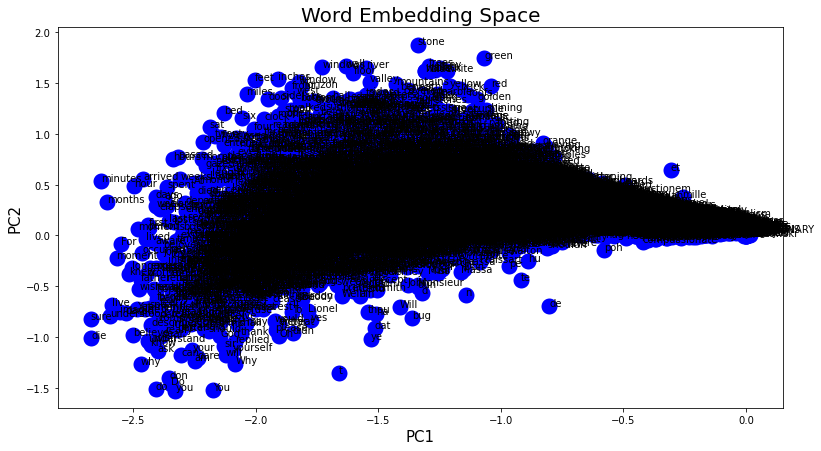

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

Find the K most frequent words

In [39]:
split_it = corpus_string.split()

In [42]:
stopwords_lst = set(stopwords.words('english'))

NameError: name 'stopwords' is not defined

In [40]:
Counter = Counter(split_it)

In [41]:
most_occur = Counter.most_common(4)
  
print(most_occur)

[('the', 33296), ('of', 20851), ('and', 17059), ('to', 12615)]
